In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100

In [2]:
GYD_muts_df = pd.read_pickle("./data/GYD_df.pkl")
GYD_muts_df.shape

(148, 45)

In [3]:
assoc_muts_df = pd.DataFrame()
for _, r in GYD_muts_df.iterrows():
    for f in r["genetic features"]:
#         display(f["significantly associated conditions"])
        if "glycerol(2.5)" in f["significantly associated conditions"]:
            assoc_muts_df = assoc_muts_df.append(r, ignore_index=True)
assoc_muts_df

,COG links,COGs,Details,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,promoter,pseudogene,range,regulator links,regulators,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
0,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism...,R665S (CGT→AGT),SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,280.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",126,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'mutation set c...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(3993145, 3993145)",{'CRP': ['cyaA']},"[{'name': 'CRP', 'significantly associated con...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{}
1,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",S59Y (TCC→TAC),SNP,4117047.0,{},NC_000913,G→T,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,280.0,{ECK120000391},1.0,{'ECK120000391': ['ECK120000391']},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...","[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",94,0.0,glpK,NH4Cl(1),{'ECK120014723': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",0.0,{'Glycerolipid metabolism': ['ECK120014723']},"[{'name': 'Glycerolipid metabolism', 'mutation...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(4117047, 4117047)","{'GlpR': ['glpFKX'], 'CRP': ['glpFKX']}","[{'name': 'GlpR', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{}
2,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,I34T (ATC→ACC),SNP,2535934.0,{},NC_000913,T→C,{},2.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,182.0,{ECK120000161},1.0,{'ECK120000161': ['ECK120000161']},"[{'name': 'crr', 'RegulonDB ID': 'ECK120000161...","[{'name': 'crr', 'RegulonDB ID': 'ECK120000161...",95,0.0,crr,NH4Cl(1),{'ECK120014520': ['ECK120000161']},"[{'name': 'ptsHI-crr', 'RegulonDB ID': 'ECK120...",0.0,{},[],KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(2535934, 2535934)","{'Mlc': ['ptsHI-crr'], 'CRP': ['ptsHI-crr'], '...","[{'name': 'NagC', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{}
3,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",N229H (AAC→CAC),SNP,4116538.0,{},NC_000913,T→G,{},2.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,182.0,{ECK120000391},1.0,{'ECK120000391': ['ECK120000391']},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...","[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",16,1.0,glpK,NH4Cl(1),{'ECK120014723': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",0.0,{'Glycerolipid metabolism': ['ECK120014723']},"[{'name': 'Glycerolipid metabolism', 'mutation...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(4116538, 4116538)","{'GlpR': ['glpFKX'], 'CRP': ['glpFKX']}","[{'name': 'GlpR', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{}
4,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism...,S478I (AGC→ATC),SNP,3992585.0,{},NC_000913,G→T,{},3.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,176.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",34,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'R

In [4]:
assoc_muts_df["sample"] = assoc_muts_df.apply(lambda r:
                                  str(r["ale"])
                                  + ' ' + str(r["flask"])
#                                   + ' ' + str(r["isolate"])
#                                   + ' ' + str(r["tech_rep"])  # commented these out since the mutations that are represented are those with highest freq across sample replications from the same flask, therefore there shouldn't be any mutation overlap between the sample replicates from the same flask.
                                          , axis=1
                                 )
assoc_muts_df.head()

,COG links,COGs,Details,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,promoter,pseudogene,range,regulator links,regulators,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,sample
0,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism...,R665S (CGT→AGT),SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,280.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",126,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'mutation set c...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(3993145, 3993145)",{'CRP': ['cyaA']},"[{'name': 'CRP', 'significantly associated con...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},1.0 280.0
1,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",S59Y (TCC→TAC),SNP,4117047.0,{},NC_000913,G→T,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,280.0,{ECK120000391},1.0,{'ECK120000391': ['ECK120000391']},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...","[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",94,0.0,glpK,NH4Cl(1),{'ECK120014723': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",0.0,{'Glycerolipid metabolism': ['ECK120014723']},"[{'name': 'Glycerolipid metabolism', 'mutation...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(4117047, 4117047)","{'GlpR': ['glpFKX'], 'CRP': ['glpFKX']}","[{'name': 'GlpR', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},1.0 280.0
2,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,I34T (ATC→ACC),SNP,2535934.0,{},NC_000913,T→C,{},2.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,182.0,{ECK120000161},1.0,{'ECK120000161': ['ECK120000161']},"[{'name': 'crr', 'RegulonDB ID': 'ECK120000161...","[{'name': 'crr', 'RegulonDB ID': 'ECK120000161...",95,0.0,crr,NH4Cl(1),{'ECK120014520': ['ECK120000161']},"[{'name': 'ptsHI-crr', 'RegulonDB ID': 'ECK120...",0.0,{},[],KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(2535934, 2535934)","{'Mlc': ['ptsHI-crr'], 'CRP': ['ptsHI-crr'], '...","[{'name': 'NagC', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},2.0 182.0
3,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",N229H (AAC→CAC),SNP,4116538.0,{},NC_000913,T→G,{},2.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,182.0,{ECK120000391},1.0,{'ECK120000391': ['ECK120000391']},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...","[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",16,1.0,glpK,NH4Cl(1),{'ECK120014723': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",0.0,{'Glycerolipid metabolism': ['ECK120014723']},"[{'name': 'Glycerolipid metabolism', 'mutation...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(4116538, 4116538)","{'GlpR': ['glpFKX'], 'CRP': ['glpFKX']}","[{'name': 'GlpR', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},2.0 182.0
4,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism...,S478I (AGC→ATC),SNP,3992585.0,{},NC_000913,G→T,{},3.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,176.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",34,0.0,cyaA,NH4Cl(1),{'ECK1200

In [5]:
sample_feat_df = pd.DataFrame()
for _, m in assoc_muts_df.iterrows():
    for mut_feat in m["genetic features"]:
        sample_feat_df = sample_feat_df.append(ignore_index=True, other={"sample": m["sample"], "mutated feature": mut_feat["name"]})
#         if "TFBS" not in mut_feat["name"]:  # Don't want to be analyzing the TFBS WRT to correlations
#             sample_feat_df = sample_feat_df.append(ignore_index=True, other={"sample": m["sample"], "mutated feature": mut_feat["name"]})
sample_feat_df.head()

,mutated feature,sample
0,cyaA,1.0 280.0
1,glpK,1.0 280.0
2,crr,2.0 182.0
3,glpK,2.0 182.0
4,cyaA,3.0 176.0


In [6]:
cross_counts_df = pd.crosstab(
        sample_feat_df["mutated feature"], sample_feat_df["sample"]
    )
cross_counts_df = cross_counts_df.T  # correlation matrix needs the targets to be the columns
cross_counts_df.head()

mutated feature,crr,cyaA,glpK,hisL/hisG,leuA/leuL,mppA,mppA/ynaI,opgH/yceK,pgrR,pgrR/mppA,yhdN/rplQ,ynaI,ynaI/insH-4
sample,,,,,,,,,,,,,
1.0 280.0,0,1,1,0,0,0,0,0,0,0,0,0,0
10.0 106.0,0,0,1,0,2,0,0,0,0,0,0,0,0
11.0 109.0,1,0,1,0,0,0,0,0,0,0,0,0,0
12.0 114.0,0,1,1,0,0,0,0,0,0,0,0,0,0
13.0 69.0,0,1,1,2,0,0,0,0,0,0,0,0,0


In [7]:
corr = cross_counts_df.corr()
corr.head()

mutated feature,crr,cyaA,glpK,hisL/hisG,leuA/leuL,mppA,mppA/ynaI,opgH/yceK,pgrR,pgrR/mppA,yhdN/rplQ,ynaI,ynaI/insH-4
mutated feature,,,,,,,,,,,,,
crr,1.000000,-0.635048,-0.040370,-0.189889,-0.156684,-0.115163,-0.115163,-0.115163,-0.115163,-0.115163,-0.115163,-0.115163,-0.115163
cyaA,-0.635048,1.000000,0.266623,0.156765,-0.158098,-0.221841,-0.221841,0.095075,-0.221841,-0.221841,0.095075,-0.221841,-0.221841
glpK,-0.040370,0.266623,1.000000,0.039862,0.032892,-0.338457,-0.338457,0.024175,-0.338457,-0.338457,0.024175,-0.338457,-0.338457
hisL/hisG,-0.189889,0.156765,0.039862,1.000000,0.051571,-0.056857,-0.056857,0.796003,-0.056857,-0.056857,0.796003,-0.056857,-0.056857
leuA/leuL,-0.156684,-0.158098,0.032892,0.051571,1.000000,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915


In [8]:
tdf = corr.copy()
tdf = tdf[1:-1]
tdf

mutated feature,crr,cyaA,glpK,hisL/hisG,leuA/leuL,mppA,mppA/ynaI,opgH/yceK,pgrR,pgrR/mppA,yhdN/rplQ,ynaI,ynaI/insH-4
mutated feature,,,,,,,,,,,,,
cyaA,-0.635048,1.000000,0.266623,0.156765,-0.158098,-0.221841,-0.221841,0.095075,-0.221841,-0.221841,0.095075,-0.221841,-0.221841
glpK,-0.040370,0.266623,1.000000,0.039862,0.032892,-0.338457,-0.338457,0.024175,-0.338457,-0.338457,0.024175,-0.338457,-0.338457
hisL/hisG,-0.189889,0.156765,0.039862,1.000000,0.051571,-0.056857,-0.056857,0.796003,-0.056857,-0.056857,0.796003,-0.056857,-0.056857
leuA/leuL,-0.156684,-0.158098,0.032892,0.051571,1.000000,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915,-0.046915
mppA,-0.115163,-0.221841,-0.338457,-0.056857,-0.046915,1.000000,1.000000,-0.034483,1.000000,1.000000,-0.034483,1.000000,1.000000
mppA/ynaI,-0.115163,-0.221841,-0.338457,-0.056857,-0.046915,1.000000,1.000000,-0.034483,1.000000,1.000000,-0.034483,1.000000,1.000000
opgH/yceK,-0.115163,0.095075,0.024175,0.796003,-0.046915,-0.034483,-0.034483,1.000000,-0.034483,-0.034483,1.000000,-0.034483,-0.034483
pgrR,-0.115163,-0.221841,-0.338457,-0.056857,-0.046915,1.000000,1.000000,-0.034483,1.000000,1.000000,-0.034483,1.000000,1.000000
pgrR/mppA,-0.115163,-0.221841,-0.338457,-0.056857,-0.046915,1.000000,1.000000,-0.034483,1.000000,1.000000,-0.034483,1.000000,1.000000


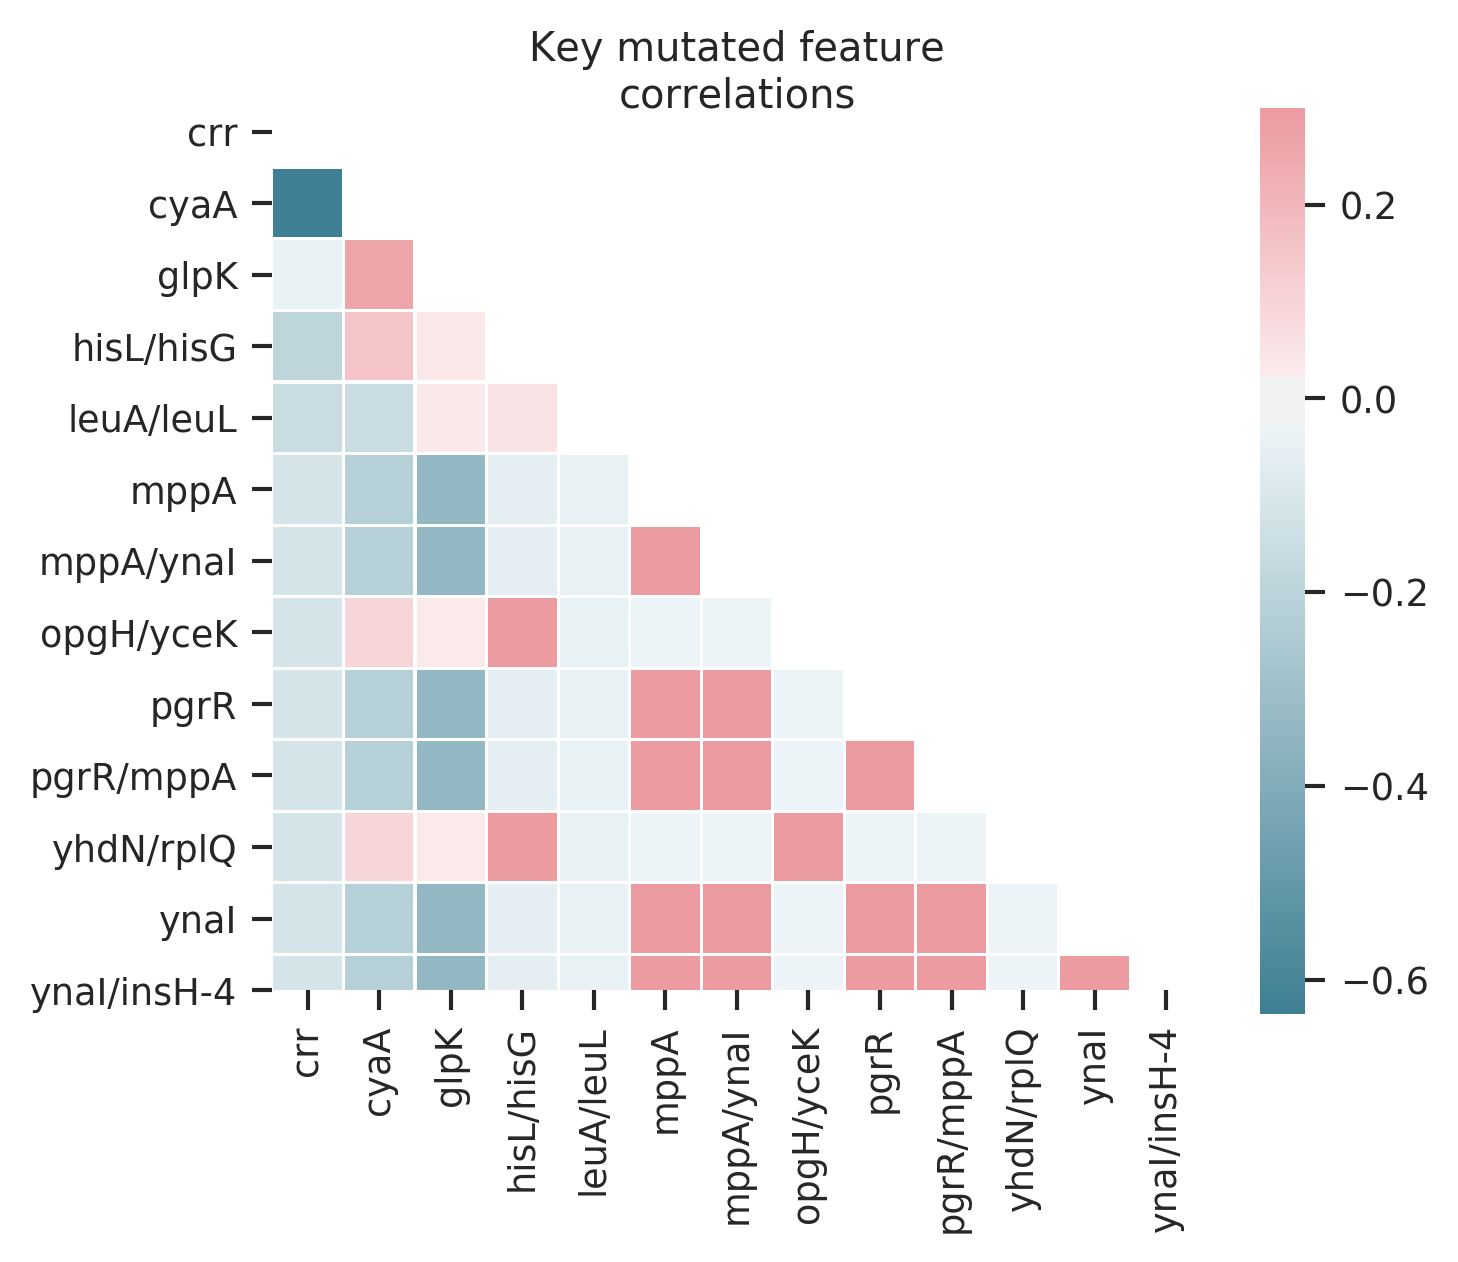

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("ticks")


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(
    figsize=(5, 5)
)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,
            cbar_kws={"shrink": 0.8}
           )
# ax.set_title("LaCroix $\it{et}$ $\it{al.}$ 2017\nkey mutated feature\ncorrelations")
ax.set_title("Key mutated feature\ncorrelations")
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_xlim(0,2)
# ax.set_ylim(3,1)
plt.savefig("fig.svg", format="svg")

In [10]:
df = pd.DataFrame()
for _, m in GYD_muts_df.iterrows():
    for f in m["genomic features"]:
        if (f["name"] == 'cyaA') | (f["name"] == 'crr') | (f["name"] == 'glpK'):
            df = df.append(m)
GYD_muts_df = df

In [11]:
# For generating input data for the correlation matrix, I need to generate a matrix that describes the 
# 1) columns as a target where 1 is a hit and 0 is not hit
# 2) rows are the individual samples

In [12]:
GYD_muts_df["sample"] = GYD_muts_df.apply(lambda r:
                                  str(r["ale"])
                                  + ' ' + str(r["flask"])
#                                   + ' ' + str(r["isolate"])
#                                   + ' ' + str(r["tech_rep"])  # commented these out since the mutations that are represented are those with highest freq across sample replications from the same flask, therefore there shouldn't be any mutation overlap between the sample replicates from the same flask.
                                          , axis=1
                                 )
GYD_muts_df.head()

,COG links,COGs,Details,Mutation Type,Position,RBS,Reference Seq,Sequence Change,TFBS,ale,attenuator terminator,base-media,calcium-source,carbon-source,coding,exp,flask,gene RegulonDB ID,genetic,genetic feature links,genetic features,genomic features,index,isolate,mutation target annotation,nitrogen-source,operon links,operons,oriC,pathway links,pathways,phosphorous-source,presence,promoter,pseudogene,range,regulator links,regulators,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator,sample
631,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism...,R665S (CGT→AGT),SNP,3993145.0,{},NC_000913,C→A,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,280.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",126,0.0,cyaA,NH4Cl(1),{'ECK120014835': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12001483...",0.0,{'Purine metabolism': ['ECK120014835']},"[{'name': 'Purine metabolism', 'mutation set c...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(3993145, 3993145)",{'CRP': ['cyaA']},"[{'name': 'CRP', 'significantly associated con...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},1.0 280.0
632,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",S59Y (TCC→TAC),SNP,4117047.0,{},NC_000913,G→T,{},1.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,280.0,{ECK120000391},1.0,{'ECK120000391': ['ECK120000391']},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...","[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",94,0.0,glpK,NH4Cl(1),{'ECK120014723': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",0.0,{'Glycerolipid metabolism': ['ECK120014723']},"[{'name': 'Glycerolipid metabolism', 'mutation...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(4117047, 4117047)","{'GlpR': ['glpFKX'], 'CRP': ['glpFKX']}","[{'name': 'GlpR', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},1.0 280.0
637,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,I34T (ATC→ACC),SNP,2535934.0,{},NC_000913,T→C,{},2.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,182.0,{ECK120000161},1.0,{'ECK120000161': ['ECK120000161']},"[{'name': 'crr', 'RegulonDB ID': 'ECK120000161...","[{'name': 'crr', 'RegulonDB ID': 'ECK120000161...",95,0.0,crr,NH4Cl(1),{'ECK120014520': ['ECK120000161']},"[{'name': 'ptsHI-crr', 'RegulonDB ID': 'ECK120...",0.0,{},[],KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(2535934, 2535934)","{'Mlc': ['ptsHI-crr'], 'CRP': ['ptsHI-crr'], '...","[{'name': 'NagC', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},2.0 182.0
640,{'Energy production and conversion': ['ECK1200...,"[{'name': 'Energy production and conversion', ...",N229H (AAC→CAC),SNP,4116538.0,{},NC_000913,T→G,{},2.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,182.0,{ECK120000391},1.0,{'ECK120000391': ['ECK120000391']},"[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...","[{'name': 'glpK', 'RegulonDB ID': 'ECK12000039...",16,1.0,glpK,NH4Cl(1),{'ECK120014723': ['ECK120000391']},"[{'name': 'glpFKX', 'RegulonDB ID': 'ECK120014...",0.0,{'Glycerolipid metabolism': ['ECK120014723']},"[{'name': 'Glycerolipid metabolism', 'mutation...",KH2PO4(3) Na2HPO4(6.8),1.00,{},0.0,"(4116538, 4116538)","{'GlpR': ['glpFKX'], 'CRP': ['glpFKX']}","[{'name': 'GlpR', 'significantly associated co...",WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,37 celsius,{},2.0 182.0
654,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism...,S478I (AGC→ATC),SNP,3992585.0,{},NC_000913,G→T,{},3.0,{},M9,CaCl2(0.1),glycerol(2.5),1.0,GYD,176.0,{ECK120000166},1.0,{'ECK120000166': ['ECK120000166']},"[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...","[{'name': 'cyaA', 'RegulonDB ID': 'ECK12000016...",34,0.0,cyaA,NH4Cl(1)

In [13]:
sample_feat_df = pd.DataFrame()
for _, m in GYD_muts_df.iterrows():
    for mut_feat in m["genomic features"]:
        if "TFBS" not in mut_feat["name"]:  # Don't want to be analyzing the TFBS WRT to correlations
            sample_feat_df = sample_feat_df.append(ignore_index=True, other={"sample": m["sample"], "mutated feature": mut_feat["name"]})
sample_feat_df.head()

,mutated feature,sample
0,cyaA,1.0 280.0
1,glpK,1.0 280.0
2,crr,2.0 182.0
3,glpK,2.0 182.0
4,cyaA,3.0 176.0


In [14]:
cross_counts_df = pd.crosstab(
        sample_feat_df["mutated feature"], sample_feat_df["sample"]
    )
cross_counts_df = cross_counts_df.T  # correlation matrix needs the targets to be the columns
cross_counts_df.head()

mutated feature,crr,cyaA,glpK
sample,,,
1.0 280.0,0,1,1
10.0 106.0,0,0,1
11.0 109.0,1,0,1
12.0 114.0,0,1,1
13.0 69.0,0,1,1


In [16]:
rename_d = {s:"$\it{"+s+"}$"  for s in tdf.columns}
cross_counts_df = cross_counts_df.rename(columns=rename_d)
cross_counts_df

mutated feature,$\it{crr}$,$\it{cyaA}$,$\it{glpK}$
sample,,,
1.0 280.0,0,1,1
10.0 106.0,0,0,1
11.0 109.0,1,0,1
12.0 114.0,0,1,1
13.0 69.0,0,1,1
14.0 68.0,0,1,1
15.0 71.0,1,0,1
16.0 70.0,0,1,1
17.0 70.0,1,0,1


In [17]:
corr = cross_counts_df.corr()
corr.head()

mutated feature,$\it{crr}$,$\it{cyaA}$,$\it{glpK}$
mutated feature,,,
$\it{crr}$,1.000000,-0.682014,-0.084889
$\it{cyaA}$,-0.682014,1.000000,0.208754
$\it{glpK}$,-0.084889,0.208754,1.000000


In [18]:
tdf = corr.copy()
tdf = tdf[1:-1]
tdf

mutated feature,$\it{crr}$,$\it{cyaA}$,$\it{glpK}$
mutated feature,,,
$\it{cyaA}$,-0.682014,1.0,0.208754


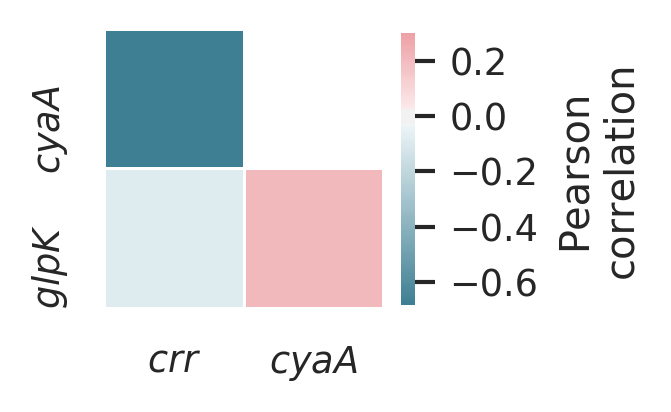

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
sns.set_context("paper")
sns.set_style("white")


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(
    figsize=(1.5, 1.5)
)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,
            cbar_kws={
                "shrink": 0.8,
                "label": "Pearson\ncorrelation"
            }
           )
# ax.set_title("LaCroix $\it{et}$ $\it{al.}$ 2017\nkey mutated feature\ncorrelations")
# ax.set_title("Key mutated feature\ncorrelations")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim(0,2)
ax.set_ylim(3,1)
plt.savefig("fig.svg", format="svg")